In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcarddata/UCI_Credit_Card.csv


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio; pio.renderers.default = "kaggle"
import warnings; warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
## Reading the data stored in .csv file as dataframe for credit_card_fault
file_path = "/kaggle/input/creditcarddata/UCI_Credit_Card.csv"
payment_df = pd.read_csv(file_path).drop(columns=["ID"], axis=1)

print(f"shape of the feature stored data: {payment_df.shape}\n")
payment_df.head()

shape of the feature stored data: (30000, 24)



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
## Changing the name of the target column and PAY_0
payment_df.rename(columns={"PAY_0" : "PAY_1", "default.payment.next.month" : "default_status_next_month"}, inplace=True)

payment_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status_next_month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
from collections import Counter

all_tags = Counter(payment_df.default_status_next_month)
all_tags.most_common()

[(0, 23364), (1, 6636)]

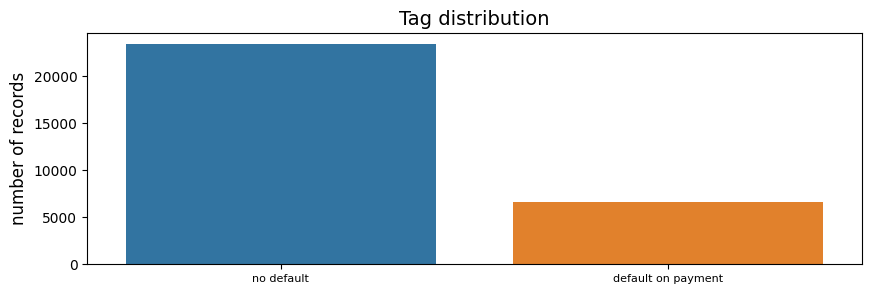

In [6]:
## Plot tag frequencies
tags, tag_counts = zip(*all_tags.most_common())
plt.figure(figsize=(10, 3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(["no default", "default on payment"], rotation=0, fontsize=8)
plt.title("Tag distribution", fontsize=14)
plt.ylabel("number of records", fontsize=12)
plt.show()

In [8]:
numerical_features = []
categorical_features = []

for col in payment_df.columns:
    if payment_df[col].nunique() > 13:
        numerical_features.append(col)
    else:
        categorical_features.append(col)
        
print(f"Here are the numerical features: \n{numerical_features}")
print(f"Here are the categorical features: \n{categorical_features}")

Here are the numerical features: 
['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Here are the categorical features: 
['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_status_next_month']


In [9]:
def remove_outliers(df):
    for col in numerical_features:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        
        df[col] = df[col].clip(lower_bound, upper_bound)
        
    return df

In [10]:
payment_df = remove_outliers(payment_df)

In [11]:
payment_df = payment_df[payment_df["BILL_AMT1"] >= 0]
payment_df.shape

(29410, 24)

In [12]:
## Let's deal with some undocumented and mislabeled categories
payment_df["EDUCATION"].value_counts()

EDUCATION
2    13815
1    10301
3     4835
5      278
4      116
6       51
0       14
Name: count, dtype: int64

In [13]:
payment_df["EDUCATION"] = payment_df["EDUCATION"].map(lambda x : 4 if x in (5, 6, 0) else x)

payment_df["EDUCATION"].value_counts()

EDUCATION
2    13815
1    10301
3     4835
4      459
Name: count, dtype: int64

In [14]:
payment_df["MARRIAGE"].value_counts()

MARRIAGE
2    15661
1    13377
3      318
0       54
Name: count, dtype: int64

In [15]:
payment_df["MARRIAGE"] = payment_df["MARRIAGE"].map(lambda x : 3 if x == 0 else x)

payment_df["MARRIAGE"].value_counts()

MARRIAGE
2    15661
1    13377
3      372
Name: count, dtype: int64

In [58]:
## Preparing the dataset for one hot encoding
payment_df.replace({
    "EDUCATION" : {
        1 : "Graduate School",
        2 : "University",
        3 : "High School",
        4 : "Other"
    },
    "MARRIAGE" : {
        1 : "Married",
        2 : "Single",
        3 : "Other"
    },
    "SEX" : {
        1 : "MALE",
        2 : "FEMALE"
    }
}, inplace=True)

payment_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status_next_month
0,20000.0,FEMALE,University,Married,24.0,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,FEMALE,University,Single,26.0,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,FEMALE,University,Single,34.0,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,FEMALE,University,Married,37.0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,MALE,University,Married,57.0,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0


In [59]:
payment_df = pd.get_dummies(payment_df, columns=["SEX", "EDUCATION", "MARRIAGE"], dtype=int)

payment_df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default_status_next_month,SEX_FEMALE,SEX_MALE,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,20000.0,24.0,2,2,-1,-1,-2,-2,3913.0,3102.0,...,1,1,0,0,0,0,1,1,0,0
1,120000.0,26.0,-1,2,0,0,0,2,2682.0,1725.0,...,1,1,0,0,0,0,1,0,0,1
2,90000.0,34.0,0,0,0,0,0,0,29239.0,14027.0,...,0,1,0,0,0,0,1,0,0,1
3,50000.0,37.0,0,0,0,0,0,0,46990.0,48233.0,...,0,1,0,0,0,0,1,1,0,0
4,50000.0,57.0,-1,0,-1,0,0,0,8617.0,5670.0,...,0,0,1,0,0,0,1,1,0,0


In [60]:
payment_df = pd.get_dummies(payment_df, columns=["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"], dtype=int)

payment_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,1,0,0,0,0,0,0,0,0,0
1,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,1,0,0,0,0,0,0
2,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
3,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,11250.5,...,0,0,1,0,0,0,0,0,0,0


**Dropping highly correlated features**

In [16]:
payment_df.drop(columns=["BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"], axis=1, inplace=True)

In [17]:
payment_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status_next_month
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,-2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26.0,-1,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,0,8617.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0


In [18]:
## Let's do balancing on train_data
from imblearn.over_sampling import SMOTE

X = payment_df.drop(columns=["default_status_next_month"], axis=1)
y = payment_df["default_status_next_month"]

print(f"Distribution of the target feature before resampling: {y.value_counts()}")

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

print(f"Distribution of the target feature after resampling: {y.value_counts()}")

Distribution of the target feature before resampling: default_status_next_month
0    22883
1     6527
Name: count, dtype: int64
Distribution of the target feature after resampling: default_status_next_month
1    22883
0    22883
Name: count, dtype: int64


In [19]:
payment_df = X.copy()
payment_df["default_status_next_month"] = y

print(f"Shape of the payment_df: {payment_df.shape}\n")
payment_df.head()

Shape of the payment_df: (45766, 19)



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status_next_month
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,-2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26.0,-1,2,0,0,0,2,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,0,8617.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0


### Splitting the Data into Train, Validation and Test

In [20]:
from sklearn.model_selection import train_test_split

test_size = 0.3
train_data, test_data = train_test_split(payment_df, stratify=payment_df.default_status_next_month, 
                                         test_size=test_size, random_state=42)

In [21]:
train_data.default_status_next_month.value_counts()

default_status_next_month
0    16018
1    16018
Name: count, dtype: int64

In [22]:
test_data.default_status_next_month.value_counts() * int((1 - test_size) / test_size)

default_status_next_month
0    13730
1    13730
Name: count, dtype: int64

In [23]:
test_data.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status_next_month
32230,210000.0,2,1,2,35.729937,0,0,-1,-1,-1,0,455.745179,0.000000,227.872589,1110.020322,3680.901636,1168.577382,0.000000,1
18486,70000.0,2,2,1,34.000000,0,0,0,0,0,0,50488.000000,2200.000000,2015.000000,2000.000000,1500.000000,1700.000000,2000.000000,0
28431,50000.0,2,3,2,30.000000,0,0,0,2,-1,-1,16986.000000,1186.000000,2000.000000,0.000000,5557.000000,470.000000,0.000000,1
19213,360000.0,2,2,1,36.000000,0,0,0,0,0,0,16557.000000,3000.000000,2000.000000,10677.500000,1066.000000,1000.000000,1000.000000,0
41015,50000.0,2,1,2,28.557349,0,0,0,0,0,0,28495.039037,1457.723065,1568.496956,1572.132573,1088.487777,1283.105227,1212.819886,1


In [22]:
train_data, validation_data = train_test_split(train_data, stratify=train_data.default_status_next_month,
                                               test_size=test_size, random_state=42)

train_data.default_status_next_month.value_counts()

default_status_next_month
1    11213
0    11212
Name: count, dtype: int64

In [23]:
validation_data.default_status_next_month.value_counts() * int((1 - test_size) / test_size)

default_status_next_month
0    9612
1    9610
Name: count, dtype: int64

In [24]:
X_train, y_train = train_data.drop(columns=["default_status_next_month"], axis=1), train_data["default_status_next_month"]
X_val, y_val = validation_data.drop(columns=["default_status_next_month"], axis=1), validation_data["default_status_next_month"]
X_test, y_test = test_data.drop(columns=["default_status_next_month"], axis=1), test_data["default_status_next_month"]

print(f"Shape of the train data: {train_data.shape}")
print(f"Shape of the X_train: {X_train.shape}")
print(f"Shape of the y_train: {y_train.shape}\n\n")

print(f"Shape of the test data: {test_data.shape}")
print(f"Shape of the X_test: {X_test.shape}")
print(f"Shape of the y_test: {y_test.shape}\n\n")

print(f"Shape of the validation data: {validation_data.shape}")
print(f"Shape of the X_val: {X_val.shape}")
print(f"Shape of the y_val: {y_val.shape}\n\n")

Shape of the train data: (22425, 19)
Shape of the X_train: (22425, 18)
Shape of the y_train: (22425,)


Shape of the test data: (13730, 19)
Shape of the X_test: (13730, 18)
Shape of the y_test: (13730,)


Shape of the validation data: (9611, 19)
Shape of the X_val: (9611, 18)
Shape of the y_val: (9611,)




In [25]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [26]:
skewed_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [27]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

standardization = StandardScaler()

scaler_pipeline = Pipeline(
    steps=[
        ("standardization", standardization)
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("scaler_pipeline", scaler_pipeline, list(X_train.columns)),
    ],
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler_pipeline',
                                 Pipeline(steps=[('standardization',
                                                  StandardScaler())]),
                                 ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
                                  'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
                                  'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1',
                                  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                  'PAY_AMT5', 'PAY_AMT6'])])

In [28]:
non_skewed_features = [x for x in list(X_train.columns) if x not in skewed_features]

In [29]:
# cols_names = skewed_features + non_skewed_features
cols_names = list(X_train.columns)

print("Before Transformation:")
print(X_train.head())

X_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_train), columns=cols_names)

print("After Transformation:")
print(X_train_preprocessed.head())

X_val_preprocessed = pd.DataFrame(preprocessor.transform(X_val), columns=cols_names)

X_test_preprocessed = pd.DataFrame(preprocessor.transform(X_test), columns=cols_names)

Before Transformation:
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE        AGE  PAY_1  PAY_2  PAY_3  \
30534    10000.0    1          2         2  38.938584     -1     -1     -1   
20331   170000.0    1          1         2  36.000000      2      2      0   
4187     20000.0    1          2         1  31.000000      1      2      0   
19259   130000.0    2          2         1  45.000000     -1      2     -1   
21397   240000.0    2          4         2  25.000000      0      0      0   

       PAY_4  PAY_5  PAY_6      BILL_AMT1     PAY_AMT1   PAY_AMT2  \
30534     -1      0      0     507.677928  2679.658189  2824.1795   
20331      0      0      0  162389.375000     0.000000  6700.0000   
4187       0      0      0   21635.000000     0.000000  1303.0000   
19259     -1     -1     -1    1980.000000     0.000000   990.0000   
21397      0      0      0   26501.000000  5000.000000  6000.0000   

          PAY_AMT3     PAY_AMT4     PAY_AMT5     PAY_AMT6  
30534  7882.649199   443.244209  

In [147]:
cols_name = list(X_train_preprocessed.columns)

In [32]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

model_performance = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1_score", "training_time", "prediction_time", "total_time"])

In [113]:
models = {
    "SVC" : SVC(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "CatBoostClassifier" : CatBoostClassifier(),
    "LGBMClassifier" : LGBMClassifier(),
    "XGBClassifier" : XGBClassifier()
}

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

def evaluate_model(true, predicted, model_name, start_time, end_training, end_prediction):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)

    print(model_name)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("="*35)
    print("\n")

    model_performance.loc[model_name] = [accuracy, precision, recall, f1, end_training-start_time, end_prediction-end_training, end_prediction-start_time]

In [115]:
import time

def model_training(X_train, y_train, X_test, y_test, models):

    for i in range(len(models)):
        start_time = time.time()
        model = list(models.values())[i]
        model.fit(X_train, y_train)
        end_training = time.time()

        y_pred = model.predict(X_test)
        end_prediction = time.time()

        evaluate_model(y_test, y_pred, list(models.keys())[i], start_time, end_training, end_prediction)

In [148]:
model_training(X_train_preprocessed, y_train, X_val_preprocessed, y_val, models)

SVC
Accuracy: 0.7655
Precision: 0.7741
Recall: 0.7496
F1 Score: 0.7617


DecisionTreeClassifier
Accuracy: 0.7284
Precision: 0.7241
Recall: 0.7380
F1 Score: 0.7310


KNeighborsClassifier
Accuracy: 0.7441
Precision: 0.7338
Recall: 0.7663
F1 Score: 0.7497


AdaBoostClassifier
Accuracy: 0.7598
Precision: 0.7710
Recall: 0.7390
F1 Score: 0.7546


GradientBoostingClassifier
Accuracy: 0.7934
Precision: 0.8092
Recall: 0.7677
F1 Score: 0.7879


RandomForestClassifier
Accuracy: 0.8254
Precision: 0.8440
Recall: 0.7983
F1 Score: 0.8205


Learning rate set to 0.038877
0:	learn: 0.6815225	total: 7.64ms	remaining: 7.63s
1:	learn: 0.6701529	total: 14.5ms	remaining: 7.22s
2:	learn: 0.6596125	total: 21.1ms	remaining: 7.01s
3:	learn: 0.6498936	total: 27.9ms	remaining: 6.95s
4:	learn: 0.6419566	total: 34ms	remaining: 6.78s
5:	learn: 0.6326722	total: 40.6ms	remaining: 6.73s
6:	learn: 0.6254159	total: 47.2ms	remaining: 6.69s
7:	learn: 0.6179950	total: 53.6ms	remaining: 6.65s
8:	learn: 0.6117371	total: 60.5ms

In [149]:
model_performance

,accuracy,precision,recall,f1_score,training_time,prediction_time,total_time
SVC,0.765477,0.774124,0.749636,0.761683,15.564204,5.789719,21.353923
DecisionTreeClassifier,0.728436,0.724117,0.737981,0.730983,0.258750,0.003348,0.262099
KNeighborsClassifier,0.744147,0.733758,0.766285,0.749669,0.003052,0.931526,0.934577
AdaBoostClassifier,0.759754,0.770951,0.739022,0.754649,1.368307,0.056380,1.424686
GradientBoostingClassifier,0.793362,0.809169,0.767742,0.787911,5.384791,0.017786,5.402576
RandomForestClassifier,0.825408,0.844004,0.798335,0.820535,4.573174,0.189317,4.762491
CatBoostClassifier,0.874207,0.918334,0.821436,0.867187,6.486788,0.009357,6.496145
LGBMClassifier,0.865883,0.901370,0.821644,0.859662,0.415080,0.035986,0.451066
XGBClassifier,0.846114,0.873372,0.809573,0.840264,0.288253,0.012593,0.300847


In [150]:
classifier = RandomForestClassifier(random_state=42)

classifier.fit(X_train_preprocessed, y_train)

y_val_pred = classifier.predict(X_val_preprocessed)

In [151]:
y_val_pred_proba = classifier.predict_proba(X_val_preprocessed)[:, 1]

In [152]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8251
Precision: 0.8430
Recall: 0.7990
F1 Score: 0.8204
ROC AUC Score: 0.8984


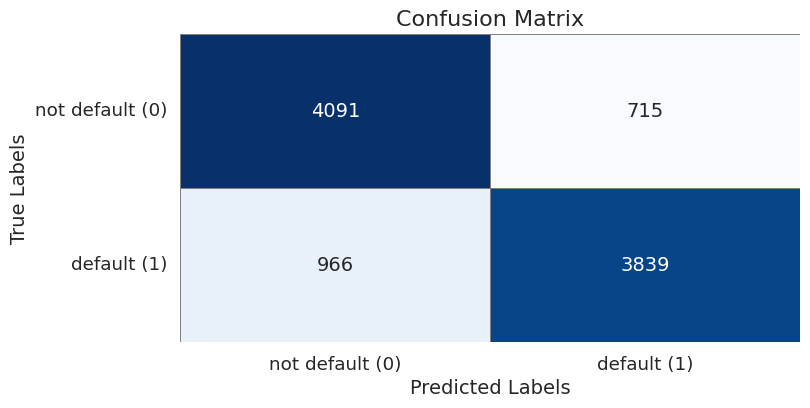

In [153]:
conf_matrix = confusion_matrix(y_true=y_val, y_pred=y_val_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

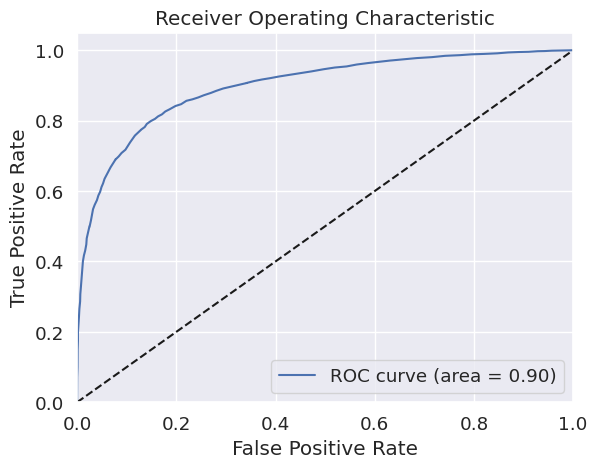

In [154]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [155]:
y_test_pred = classifier.predict(X_test_preprocessed)
y_test_pred_proba = classifier.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8189
Precision: 0.8380
Recall: 0.7905
F1 Score: 0.8136
ROC AUC Score: 0.8958


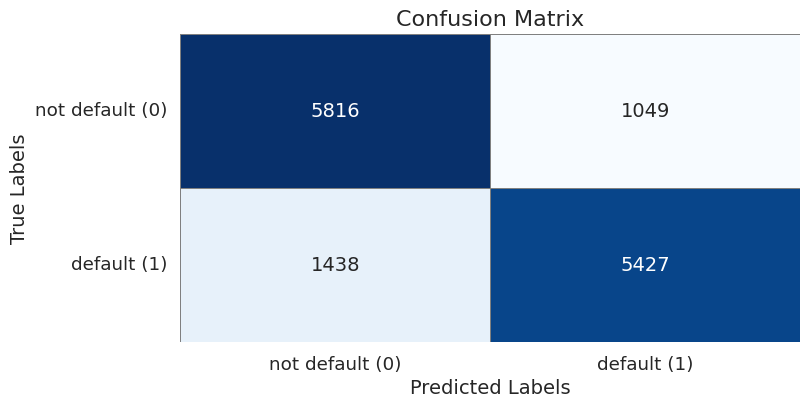

In [156]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def objective(trial):
    
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
    }
    
    model = RandomForestClassifier(
        **params,
        random_state=42
    )
    
    def custom_scorer(y_true, y_pred):
        precision = precision_score(y_true=y_true, y_pred=y_pred)
        recall = recall_score(y_true=y_true, y_pred=y_pred)
        roc_auc = roc_auc_score(y_true, y_pred)
        
        return (precision + recall + roc_auc) / 3
    
    scores = cross_val_score(model, X_train_preprocessed, y_train_resampled, cv=5, scoring=make_scorer(custom_scorer))
    
    return scores.mean()

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"\nBest Hyperparameter: {best_params}")

In [ ]:
best_score = study.best_value
print(f"\nBest custom score (average of precision, recall and roc_auc_score): {best_score}")

In [ ]:
randomFC = RandomForestClassifier(**best_params, random_state=42)

randomFC.fit(X_train_preprocessed, y_train_resampled)

y_test_pred = randomFC.predict(X_test_preprocessed)
y_test_pred_proba = randomFC.predict_proba(X_test_preprocessed)[:, 1]

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

In [ ]:
conf_matrix = confusion_matrix(y_true=y_val, y_pred=y_val_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**LightGBM**

In [157]:
lightC = LGBMClassifier()

lightC.fit(X_train_preprocessed, y_train)

y_val_pred = lightC.predict(X_val_preprocessed)

[LightGBM] [Info] Number of positive: 11213, number of negative: 11212
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2322
[LightGBM] [Info] Number of data points in the train set: 22425, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500022 -> initscore=0.000089
[LightGBM] [Info] Start training from score 0.000089


In [158]:
y_val_pred_proba = lightC.predict_proba(X_val_preprocessed)[:, 1]

In [159]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8659
Precision: 0.9014
Recall: 0.8216
F1 Score: 0.8597
ROC AUC Score: 0.9270


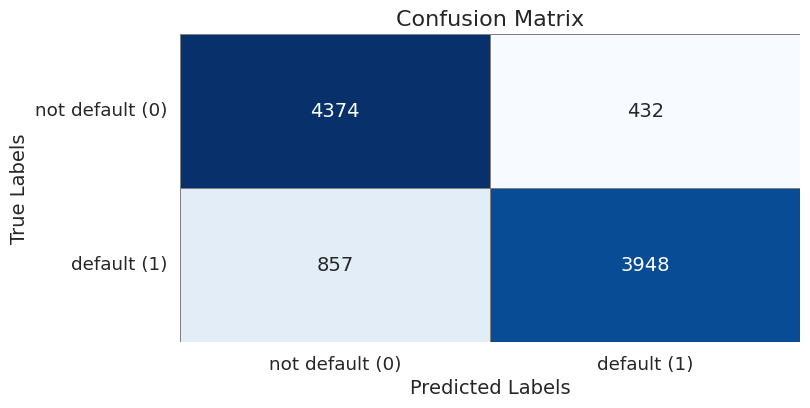

In [160]:
conf_matrix = confusion_matrix(y_true=y_val, y_pred=y_val_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

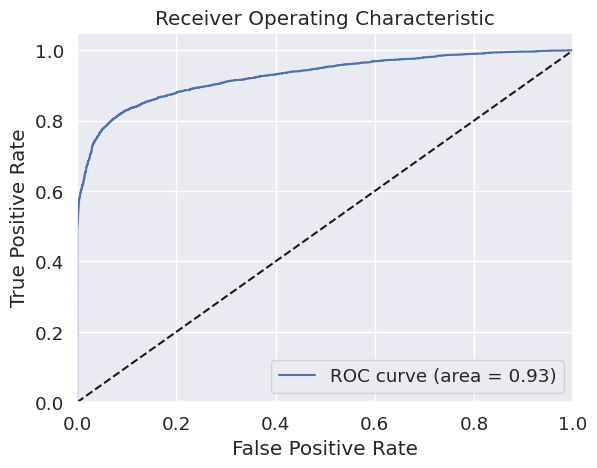

In [161]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [162]:
y_test_pred = lightC.predict(X_test_preprocessed)
y_test_pred_proba = lightC.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8598
Precision: 0.8933
Recall: 0.8172
F1 Score: 0.8536
ROC AUC Score: 0.9238


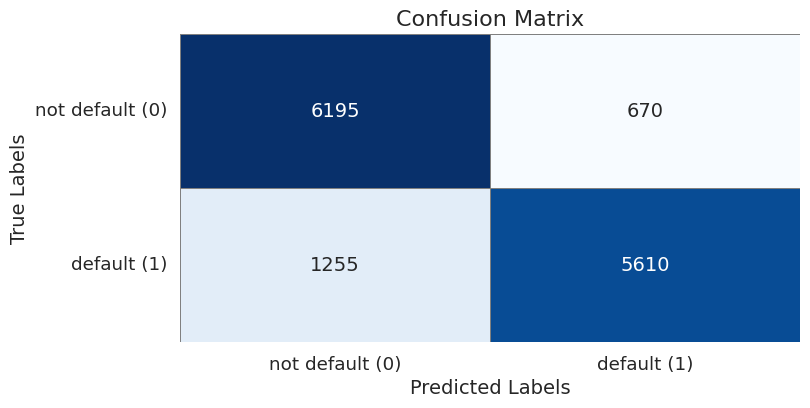

In [163]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

In [43]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def objective(trial):
    
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 1, 300),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
    }
    
    model = LGBMClassifier(
        **params,
        n_jobs=-1,
        verbose=-1,
        random_state=42
    )
    
    scores = cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring=make_scorer(recall_score), n_jobs=-1)
    
    return scores.mean()

In [1]:
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.SuccessiveHalvingPruner(), 
                            sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"\nBest Hyperparameter: {best_params}")

In [ ]:
best_score = study.best_value
print(f"\nBest custom score (average of precision, recall and roc_auc_score): {best_score}")

In [ ]:
lightGBMC = LGBMClassifier(**best_params, n_jobs=-1, verbose=-1, random_state=42)

lightGBMC.fit(X_train_preprocessed, y_train)

y_test_pred = lightGBMC.predict(X_test_preprocessed)
y_test_pred_proba = lightGBMC.predict_proba(X_test_preprocessed)[:, 1]

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**CatBoostClassifier**

In [164]:
catBC = CatBoostClassifier(verbose=False)

catBC.fit(X_train_preprocessed, y_train)

y_val_pred = catBC.predict(X_val_preprocessed)

In [165]:
y_val_pred_proba = catBC.predict_proba(X_val_preprocessed)[:, 1]

In [166]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8742
Precision: 0.9183
Recall: 0.8214
F1 Score: 0.8672
ROC AUC Score: 0.9314


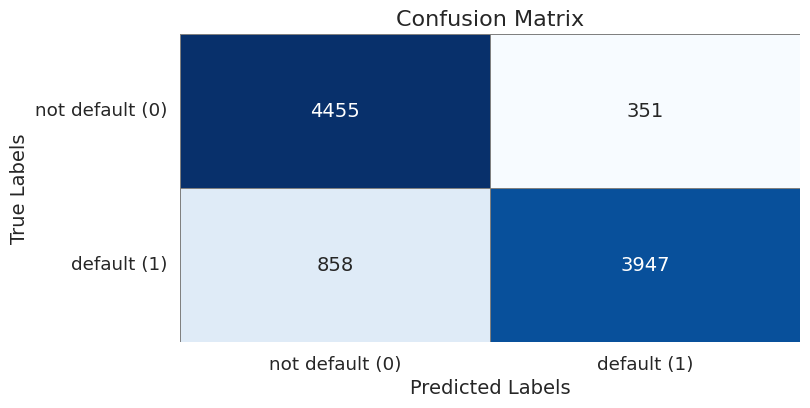

In [167]:
conf_matrix = confusion_matrix(y_true=y_val, y_pred=y_val_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

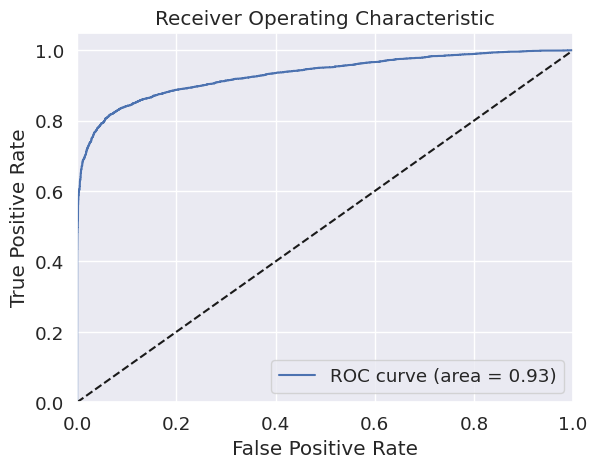

In [168]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [169]:
y_test_pred = catBC.predict(X_test_preprocessed)
y_test_pred_proba = catBC.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8698
Precision: 0.9118
Recall: 0.8189
F1 Score: 0.8629
ROC AUC Score: 0.9292


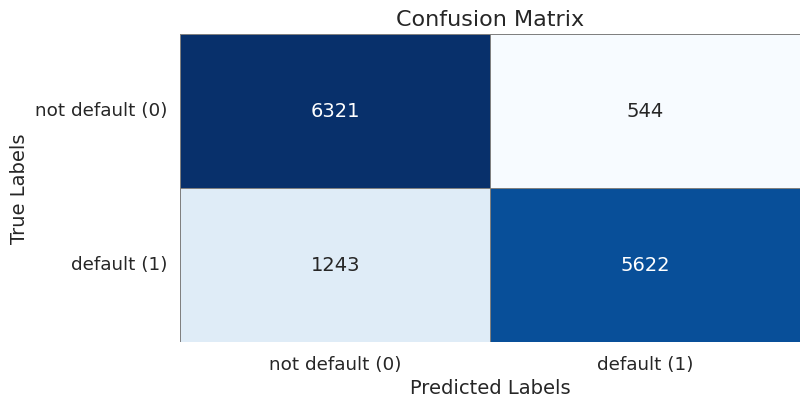

In [170]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

In [33]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def objective(trial):
    
    params = {
            "iterations": trial.suggest_int("iterations", 100, 1000),
            "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
            "depth": trial.suggest_int("depth", 4, 10),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 10.0, log=True),
            "random_strength": trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
            "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
            "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        }
    
    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0.0, 10.0)
    elif params["bootstrap_type"] == "Bernoulli":
        params["subsample"] = trial.suggest_float("subsample", 0.1, 1.0)
    
    model = CatBoostClassifier(
        **params,
        loss_function="Logloss",
        eval_metric="Recall",
        task_type="GPU",
        verbose=False,
        random_state=42
    )
    
    scores = cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring=make_scorer(recall_score))
    
    return scores.mean()

In [36]:
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.SuccessiveHalvingPruner(), 
                            sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=50)

best_params = study.best_params
print(f"\nBest Hyperparameter: {best_params}")

[I 2024-07-05 06:20:08,967] A new study created in memory with name: no-name-f496de5c-4af6-4fc3-9fe2-5c0765d9a5d4
[I 2024-07-05 06:24:33,306] Trial 0 finished with value: 0.8166418032431555 and parameters: {'iterations': 528, 'learning_rate': 0.034859737853811114, 'depth': 8, 'l2_leaf_reg': 3.531550561765841e-05, 'random_strength': 1.5838946879070235e-05, 'bootstrap_type': 'Bayesian', 'min_data_in_leaf': 46, 'bagging_temperature': 0.19595540337885242}. Best is trial 0 with value: 0.8166418032431555.
[I 2024-07-05 06:29:49,549] Trial 1 finished with value: 0.7460973837527238 and parameters: {'iterations': 553, 'learning_rate': 0.005940557168452591, 'depth': 8, 'l2_leaf_reg': 4.001905354264815e-05, 'random_strength': 0.44483505241992516, 'bootstrap_type': 'Bayesian', 'min_data_in_leaf': 20, 'bagging_temperature': 6.506740262665399}. Best is trial 0 with value: 0.8166418032431555.
[I 2024-07-05 06:30:07,650] Trial 2 finished with value: 0.8153035531694799 and parameters: {'iterations': 47


Best Hyperparameter: {'iterations': 425, 'learning_rate': 0.12508913183974496, 'depth': 9, 'l2_leaf_reg': 0.6083397395325884, 'random_strength': 0.00013381358963174, 'bootstrap_type': 'Bayesian', 'min_data_in_leaf': 33, 'bagging_temperature': 2.2144485527199556}


In [37]:
best_score = study.best_value
print(f"\nBest custom score (average of precision, recall and roc_auc_score): {best_score}")


Best custom score (average of precision, recall and roc_auc_score): 0.8318914668810052


In [39]:
catBC = CatBoostClassifier(**best_params, loss_function="Logloss", eval_metric="Recall", task_type="GPU",
                           verbose=False, random_state=42)

catBC.fit(X_train_preprocessed, y_train)

y_test_pred = catBC.predict(X_test_preprocessed)
y_test_pred_proba = catBC.predict_proba(X_test_preprocessed)[:, 1]

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8502
Precision: 0.8668
Recall: 0.8275
F1 Score: 0.8467
ROC AUC Score: 0.9159


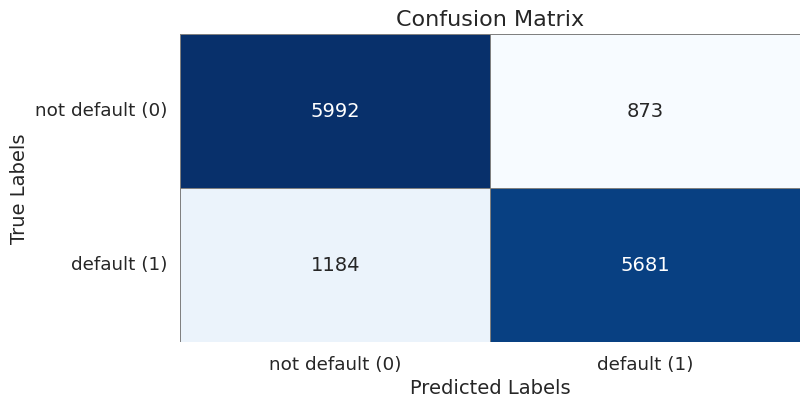

In [41]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

class_names = ['not default (0)', 'default (1)']

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2) 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names)
plt.yticks(rotation=0)

plt.show()

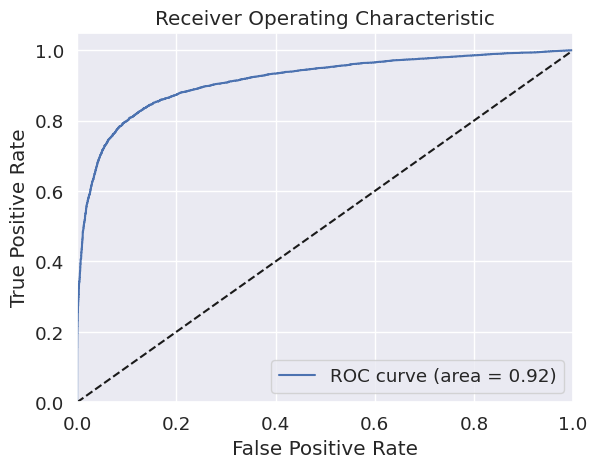

In [42]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()